In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style("darkgrid",{"font.sans-serif":['KaiTi', 'Arial']})
# plt.style.use('ggplot')
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False   #这两行需要手动设置
%matplotlib inline

In [2]:
# df1 = pd.read_csv("./Funds/data/DRL_trained_results/df_PPO_vgg2_softmax_maxSharpe.csv",index_col='date',parse_dates=True)
df2= pd.read_csv("./Stocks/data/DRL_trained_results/df_PPO_vgg1_softmax_maxAVGSharpe.csv",index_col='date',parse_dates=True)



In [3]:
df2.sort_index(inplace=True, axis=1)
del df2['date.1']
del df2['weights_mean']
del df2['weights_std']
del df2['market_return']
del df2['market_value']
del df2['steps']

In [4]:
df2.head(2)

,cost,log_return,portfolio_value,price_CASH,price_CN000338.SZ,price_CN002027.SZ,price_CN002371.SZ,price_CN600009.SH,price_CN600029.SH,price_CN600183.SH,...,weight_CN000338.SZ,weight_CN002027.SZ,weight_CN002371.SZ,weight_CN600009.SH,weight_CN600029.SH,weight_CN600183.SH,weight_CN600406.SH,weight_CN600900.SH,weight_CN601989.SH,weight_CN601998.SH
date,,,,,,,,,,,,,,,,,,,,,
2023-08-07,0.000000,0.000000,1.000000,1.0,0.993172,0.982506,0.986057,0.993175,1.001764,0.984096,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-08-08,0.002219,-0.002221,0.997781,1.0,0.993125,1.005935,0.978560,0.990263,0.982394,1.006838,...,0.08814,0.112525,0.112525,0.112525,0.041396,0.041396,0.112525,0.112525,0.112525,0.041396


In [5]:
df2.iloc[:,4:14] = df2.iloc[:,4:14].cumprod()    # 把相对价格向量转换为价格

# 画图股票的回测结果

<Axes: ylabel='股票组合资产价值'>

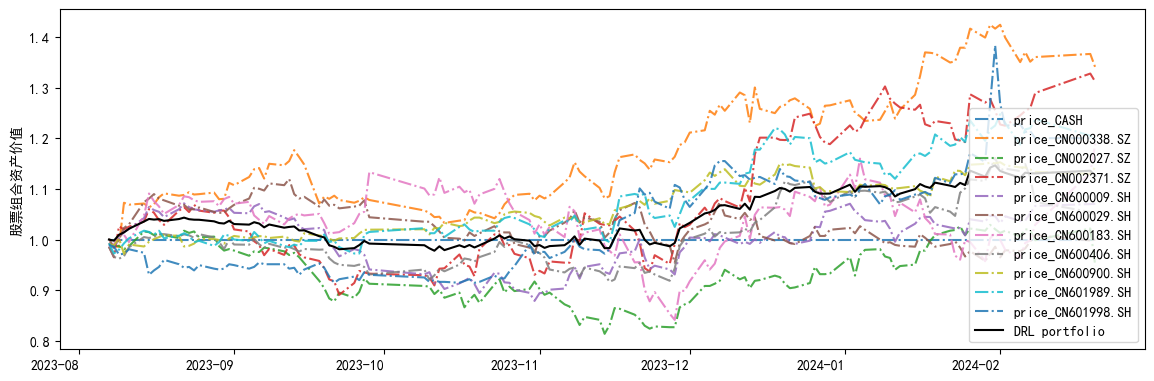

In [6]:
fig_stocks_values = plt.figure(figsize=(14,5))
# plt.suptitle('回测结果图', fontsize=16,x=0.51,y=0.95)
ax_values = fig_stocks_values.add_subplot(1, 1, 1)
df2.rename(columns={'portfolio_value': 'DRL portfolio'}, inplace=True)  # 重命名
df2.iloc[:,3:14].plot(ax=ax_values,alpha=0.85,xlabel='',linestyle='-.',ylabel='股票组合资产价值',
#                     fontsize=22,
                    )
df2.iloc[:,2].plot(ax=ax_values, color="black",xlabel='',legend=True, rot=0)

Text(0, 0.5, 'Stock Portfolio Transaction Costs')

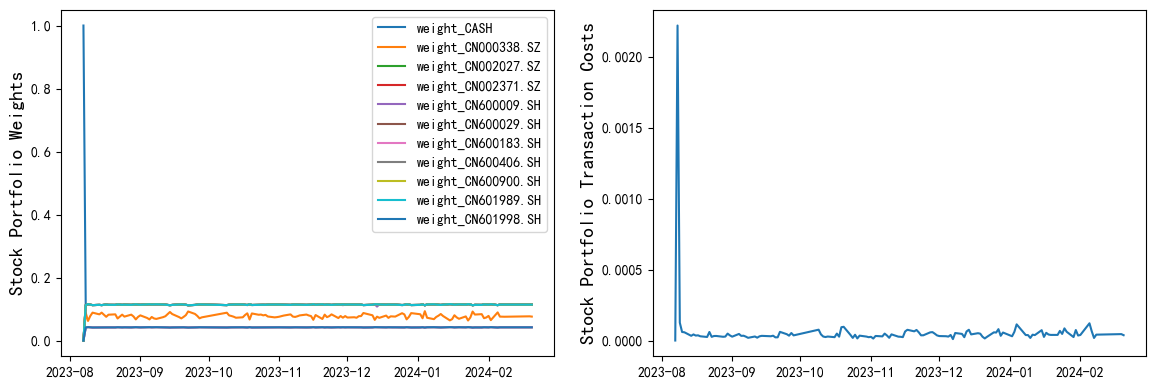

In [7]:
fig_stocks_costs_and_weights = plt.figure(figsize=(14,4.5))
# plt.suptitle('标题', fontsize=16,x=0.51,y=0.95)
ax1_stocks_w = fig_stocks_costs_and_weights.add_subplot(1, 2, 1)
ax2_stocks_c = fig_stocks_costs_and_weights.add_subplot(1, 2, 2)
# plt.subplots_adjust(wspace=0.15, hspace=0.25)
ax1_stocks_w.plot(df2.index[:],df2.iloc[:,16:]),ax1_stocks_w.legend(df2.iloc[:,16:])
ax1_stocks_w.set_ylabel('Stock Portfolio Weights', fontsize=14)

ax2_stocks_c.plot(pd.to_datetime(df2.index[:]),df2['cost']) # 若在载入数据时没有用parse_dates，需用pd.to_datetime转换成时间类型
ax2_stocks_c.set_ylabel('Stock Portfolio Transaction Costs', fontsize=14)

In [8]:
fig_stocks_costs_and_weights.savefig('./img/plot_DRL_BackTest/Testingweights&cost.svg', 
                      bbox_inches='tight',
                      dpi=300,
                      format='svg')

(array([19570., 19601., 19631., 19662., 19692., 19723., 19754.]),
 [Text(19570.0, 0, '2023-08'),
  Text(19601.0, 0, '2023-09'),
  Text(19631.0, 0, '2023-10'),
  Text(19662.0, 0, '2023-11'),
  Text(19692.0, 0, '2023-12'),
  Text(19723.0, 0, '2024-01'),
  Text(19754.0, 0, '2024-02')])

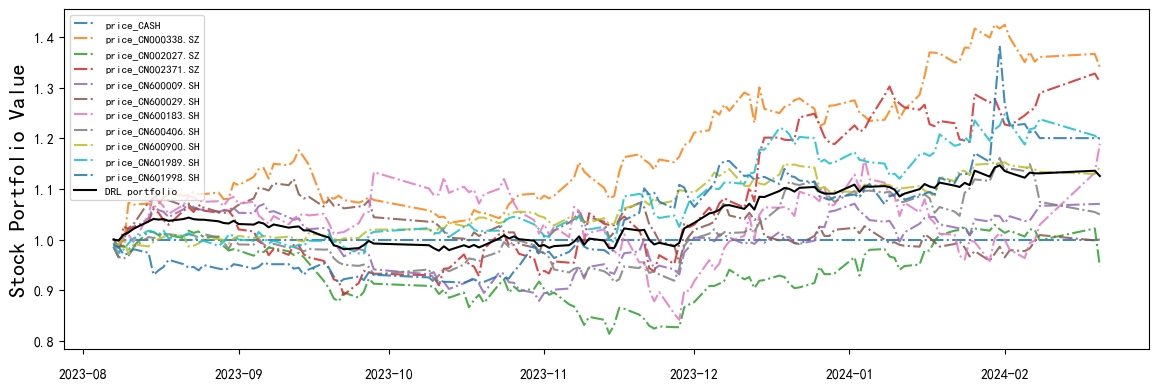

In [9]:
fig_stocks_values = plt.figure(figsize=(14,5))
ax_values = fig_stocks_values.add_subplot(1, 1, 1)

# 绘制主要数据
df2.iloc[:,3:14].plot(ax=ax_values,
                      alpha=0.85,
                      xlabel='',
                      linestyle='-.',
                      ylabel='Stock Portfolio Value')

df2.iloc[:,2].plot(ax=ax_values, 
                   color="black",
                   xlabel='',
                   legend=True, 
                   rot=0)

# 设置 y 轴标签和字体大小
ax_values.set_ylabel('Stock Portfolio Value', fontsize=16)  # 这里的12可以根据需要调整

# 设置图例
ax_values.legend(loc='upper left', fontsize=8)

# 设置 x 轴标签居中
ax_values.tick_params(axis='x', which='major', pad=10)
plt.xticks(ha='center')

In [10]:
fig_stocks_values.savefig('./img/plot_DRL_BackTest/stock_portfolio_value.svg', 
                      bbox_inches='tight',
                      dpi=300,
                      format='svg')